# <center>Are employees dissatisfied?</center>
###  <center>An analysis of exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia</center>

### We aim to answer the following question:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

### <center>Data</center>
* DETE Exit Survey: https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey
* TAFE Exit Surveys: Original no longer available, stored locally
* During analysis of DETE exit surveys, it was found that there are quite a few null values. In some columns, the null values are comparable to the size of the dataset.
* In DETE surveys, some null values are represented as 'Not Stated'. They are replaced by NaN, to be counted as null values.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')

In [3]:
#reading CSVs into pandas dataframes
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [4]:
#DETE survey columns and counts
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
#first 5 rows
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


##### Null Values

In [8]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [9]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [10]:
#nan values addition using pandas
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')


##### Cleaning and preparation

In [11]:
#dropping columns we donot need
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [12]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

The columns are renamed for better readability and can be easily combined with TAFE.

In [13]:
#renaming columns by removing whitespace, and converting to lower case
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [14]:
#matching column names in both DETE and TAFE
col_dict={'Record ID':'id','CESSATION YEAR':'cease_date','Reason for ceasing employment':'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(col_dict,axis=1,inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### <center>Leading cause of separation from the company</center>

In [15]:
dete_separation_type=pd.DataFrame(dete_survey_updated['separationtype'].value_counts(dropna=True))
dete_separation_type

,separationtype
Age Retirement,285
Resignation-Other reasons,150
Resignation-Other employer,91
Resignation-Move overseas/interstate,70
Voluntary Early Retirement (VER),67
Ill Health Retirement,61
Other,49
Contract Expired,34
Termination,15


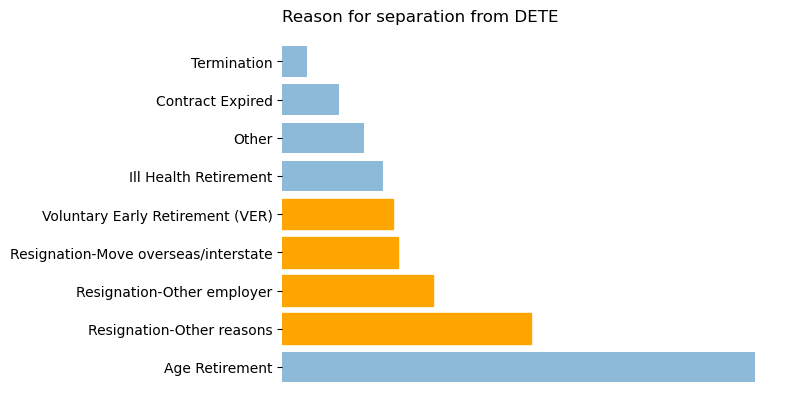

In [16]:
#dete_separation_type['separationtype'].plot(kind='bar',rot=45)
fig,ax=plt.subplots()
barlist=ax.barh(y=dete_separation_type.index,width=dete_separation_type['separationtype'],alpha=0.5)
barlist[1].set_color('orange')
barlist[2].set_color('orange')
barlist[3].set_color('orange')
barlist[4].set_color('orange')
barlist[1].set_alpha(1)
barlist[2].set_alpha(1)
barlist[3].set_alpha(1)
barlist[4].set_alpha(1)
ax.get_xaxis().set_ticks([])
ax.set_frame_on(False)
ax.set_title('Reason for separation from DETE',loc='left')
plt.savefig('dete_separation.jpg',transparent=True, bbox_inches="tight")

In [17]:
#for html slides display purposes

<img src="dete_separation.jpg" style='display:block;margin:auto' >
<p style="text-align: center;">According to the DETE survey, the total number of people who resigned is 311, which is comparable to the number of people who retired because of their age.</p>

In [18]:
tafe_separation_type=pd.DataFrame(tafe_survey_updated['separationtype'].value_counts(dropna=True))
tafe_separation_type

,separationtype
Resignation,340
Contract Expired,127
Retrenchment/ Redundancy,104
Retirement,82
Transfer,25
Termination,23


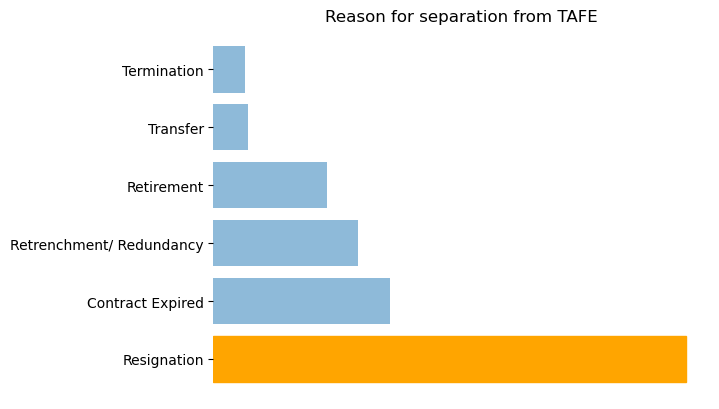

In [19]:
#tafe_separation_type['separationtype'].plot(kind='bar')
fig,ax=plt.subplots()
barlist=ax.barh(y=tafe_separation_type.index,width=tafe_separation_type['separationtype'],alpha=0.5)
barlist[0].set_color('orange')
barlist[0].set_alpha(1)
ax.get_xaxis().set_ticks([])
ax.set_title('Reason for separation from TAFE',loc='center')
ax.set_frame_on(False)
plt.savefig('tafe_separation.jpg',transparent=True, bbox_inches="tight")

In [20]:
#for html slides display purposes

<img src="tafe_separation.jpg" style='display:block;margin:auto' >
<p style="text-align: center;">The leading cause of separation according to TAFE is Resignation. A total of 340 people resigned, which is more than double of the number of people whose contract expired.</p>

### <center>A deep dive into resignation numbers</center>

In [21]:
# create a boolean mask using regex to extract the entries that contain Resignation as separation type in the DETE dataset
regex=r"Resignation"
resignation_dete=dete_survey_updated['separationtype'].str.contains(regex)

In [22]:
resignation_dete

0      False
1      False
2      False
3       True
4      False
       ...  
817    False
818    False
819     True
820    False
821     True
Name: separationtype, Length: 822, dtype: bool

In [23]:
#apply mask and get resignation numbers 
dete_resignations=dete_survey_updated[resignation_dete].copy()
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [24]:
#same for TAFE
resignation_tafe=tafe_survey_updated['separationtype'].str.contains(regex,na=False)
tafe_resignations=tafe_survey_updated[resignation_tafe].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [25]:
#different date formats 
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [26]:
#convert all dates to year using regex
year_dete=r"(20[0-9][0-9])"
dete_resignations['cease_date']=dete_resignations['cease_date'].str.extract(year_dete).astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [27]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [28]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [29]:
#creating a column for number of years worked
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
12.0     6
14.0     6
18.0     5
16.0     5
24.0     4
23.0     4
11.0     4
32.0     3
39.0     3
21.0     3
19.0     3
25.0     2
28.0     2
26.0     2
30.0     2
36.0     2
33.0     1
35.0     1
49.0     1
38.0     1
41.0     1
27.0     1
42.0     1
29.0     1
34.0     1
31.0     1
Name: institute_service, dtype: int64

In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [32]:
#converting dissatisfaction to boolean values
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]=tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)  
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].head(20) 

        

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [33]:
#combining both Dissatisfaction and Job Dissatisfaction values into one column
tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].head(20)

3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
13    False
14     True
15    False
16     True
17     True
18     True
19    False
20     True
21    False
22    False
23    False
24    False
Name: dissatisfied, dtype: bool

In [34]:
#extracting all columns where resignation is due to dissatisfaction in DETE
dissatisfaction_cols=['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition',
'lack_of_job_security',
'work_location','employment_conditions',
'work_life_balance',
'workload']
dete_resignations['dissatisfied']=dete_resignations[dissatisfaction_cols].any(axis=1,skipna=False)

In [35]:
dete_resignations['dissatisfied'].head(20)

3     False
5      True
8     False
9      True
11    False
12    False
14     True
16     True
20    False
21    False
22     True
23     True
25     True
27    False
33     True
34     True
37    False
39     True
40    False
41     True
Name: dissatisfied, dtype: bool

In [36]:
dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()

In [37]:
#identify any employees who resigned because they were dissatisfied.
dete_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [38]:
#add an institute column
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [39]:
#combine the datasets
combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True,axis=0)
combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [40]:
#Removed columns with too many null entries
combined_updated=combined.dropna(axis=1,thresh=500)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


In [41]:
combined_updated['institute_service']=combined_updated['institute_service'].astype(str).str.extract('(\d+)').astype(float)

C:\Users\hp\AppData\Local\Temp\ipykernel_10132\1296949271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service']=combined_updated['institute_service'].astype(str).str.extract('(\d+)').astype(float)


In [42]:
combined_updated['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
2.0      14
9.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
22.0      6
14.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
30.0      2
26.0      2
36.0      2
29.0      1
34.0      1
27.0      1
42.0      1
35.0      1
41.0      1
49.0      1
33.0      1
38.0      1
31.0      1
Name: institute_service, dtype: int64

According to the number of years an employee worked at the institutes, they were categorized as:
* New : Less than 3 years
* Experienced : Between 3 and 6 years
* Established : Between 7 and 10 years
* Veteran : More than 10 years

In [43]:
#mapping service to career stage
def service_to_career(val):
    if pd.isnull(val):
        return np.nan
    elif val<3:
        return 'New'
    elif val>=3 and val <=6:
        return 'Experienced'
    elif val>=7 and val <=10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat']=combined_updated['institute_service'].apply(service_to_career)

    

C:\Users\hp\AppData\Local\Temp\ipykernel_10132\2177908979.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat']=combined_updated['institute_service'].apply(service_to_career)


In [44]:
combined_updated['service_cat'].value_counts(dropna=False)


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [45]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [46]:
combined_updated['dissatisfied'].fillna(value=False,inplace=True)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    float64
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
 10  service_cat        563 non-null    object 
dtypes: bool(1), float64(3), object(7)
memory usage: 51.6+ KB


C:\Users\hp\AppData\Local\Temp\ipykernel_10132\4077411897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['dissatisfied'].fillna(value=False,inplace=True)


In [47]:
#dissatisfied mask
combined_updated_resignation_dissatisfied=combined_updated[combined_updated['dissatisfied']==True]
combined_updated_resignation_dissatisfied.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
6,15.0,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,31-35,5.0,True,DETE,Experienced
7,17.0,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE,NaN
10,23.0,Resignation-Other reasons,2012.0,School Administrative Staff,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran


In [48]:
counts=pd.DataFrame(combined_updated_resignation_dissatisfied.groupby(['service_cat'])['service_cat'].count())
print(counts)

             service_cat
service_cat             
Established           32
Experienced           59
New                   57
Veteran               66


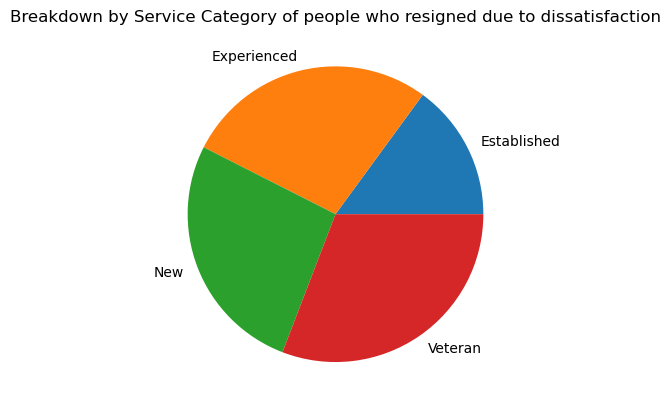

In [49]:
fig,ax=plt.subplots()
ax.pie(counts['service_cat'],labels=counts.index)
ax.set_title("Breakdown by Service Category of people who resigned due to dissatisfaction")
plt.savefig('service_separation.jpg',transparent=True, bbox_inches="tight")

<img src="service_separation.jpg" style='display:block;margin:auto' >
<p style="text-align: center;">Out of the people who resigned due to dissatisfaction, there is a large number of veteran, experienced, and new employees.</p>

### <center>Next steps</center>
* Why are they dissatisfied?
* What can we do to improve retention rates for new employees (maybe career development programs)?
* Why are experienced and veteran employees dissatisfied (maybe salary, promotions)? 